<a href="https://colab.research.google.com/github/ReemAlsharabi/CS4073/blob/main/Labs/Lab6/Lab6_Reem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reem Alsharabi S20106353

# Graph Grammar

In [1]:
pip install networkx

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("gapminder.tsv", sep='\t')

In [4]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [5]:
df.shape

(1704, 6)

In [7]:
G = nx.DiGraph()

In [8]:
for index, row in df.iterrows():
    G.add_node(row['country'])
    G.add_node(row['continent'])
    G.add_node(row['year'])

    G.add_edge(row['country'], row['continent'], label='is_in')
    G.add_edge(row['country'], str(row['year']), label='exists_in')
    G.add_edge(row['country'], 'lifeExp', label=row['lifeExp'])
    G.add_edge(row['country'], 'pop', label=row['pop'])
    G.add_edge(row['country'], 'gdpPercap', label=row['gdpPercap'])

In [9]:
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'label')

{('Afghanistan',
  'Asia'): Text(-0.3492676290928258, 0.34302084686479783, 'is_in'),
 ('Afghanistan',
  '1952'): Text(0.15853266543337668, -0.37899435552210037, 'exists_in'),
 ('Afghanistan',
  'lifeExp'): Text(0.22787452549083648, 0.3979002712731733, '43.828'),
 ('Afghanistan',
  'pop'): Text(-0.13218141922385832, -0.4691237956170109, '31889923'),
 ('Afghanistan',
  'gdpPercap'): Text(-0.4681590825240682, -0.2876359370573647, '974.5803384'),
 ('Afghanistan',
  '1957'): Text(0.35614869207180627, -0.12289486966099994, 'exists_in'),
 ('Afghanistan',
  '1962'): Text(-0.22524778259497438, 0.4662512446939457, 'exists_in'),
 ('Afghanistan',
  '1967'): Text(0.3866578300708893, -0.19317858356372059, 'exists_in'),
 ('Afghanistan',
  '1972'): Text(0.28265112129842307, 0.3137385435075194, 'exists_in'),
 ('Afghanistan',
  '1977'): Text(0.35761401956078, 0.21512307234531547, 'exists_in'),
 ('Afghanistan',
  '1982'): Text(0.3003304846561514, 0.32654408450593975, 'exists_in'),
 ('Afghanistan',
  '198

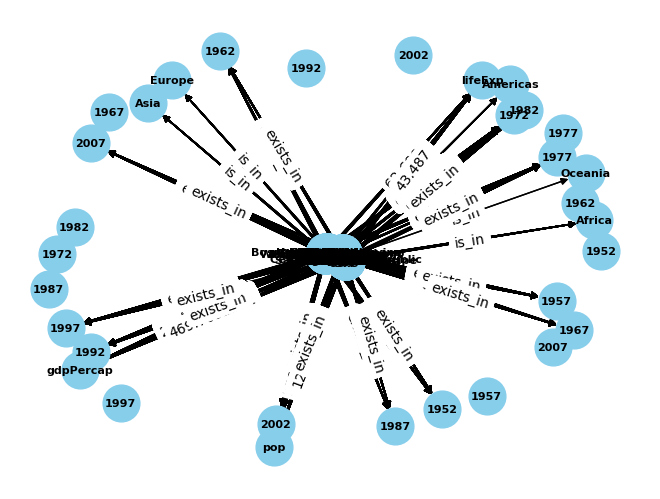

In [10]:
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

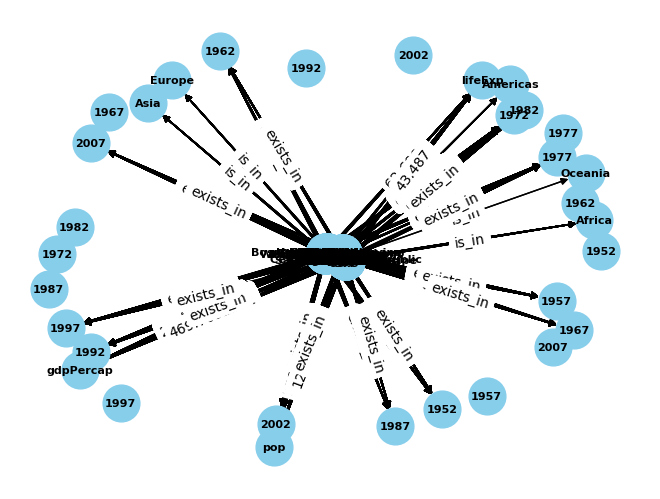

# Extra

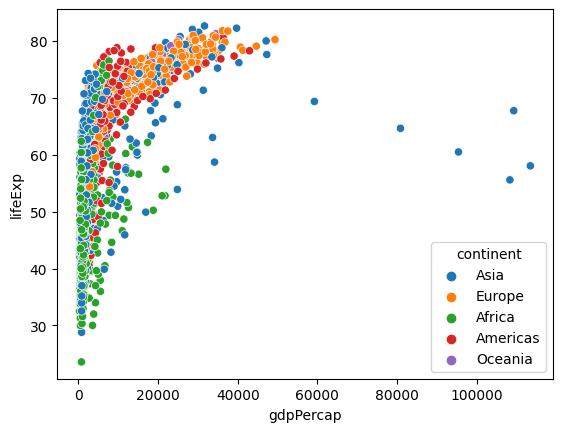

In [ ]:
sns.scatterplot(data=df, x='gdpPercap', y='lifeExp', hue='continent')
plt.show()

The scatter plot suggests an exponential relationship between GDP per capita and life expectancy when considering different continents. The plot shows that as GDP per capita increases, life expectancy tends to increase as well. The use of the hue parameter allows for differentiation and comparison of this relationship across different continents.

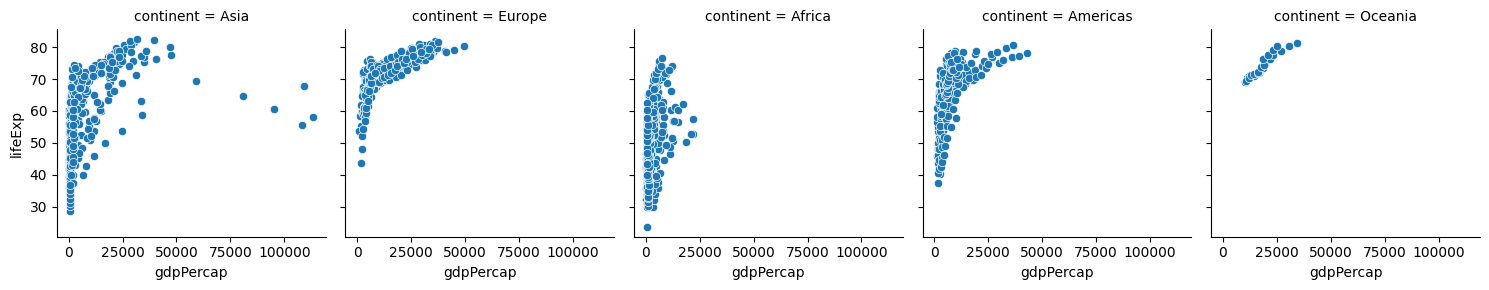

In [ ]:
g = sns.FacetGrid(df, col='continent')
g.map(sns.scatterplot, 'gdpPercap', 'lifeExp')
plt.show()

The facet grid of scatter plots, with each plot representing a different continent, shows an overall exponential relationship between GDP per capita and life expectancy. As GDP per capita increases, life expectancy tends to increase as well across all continents. However, the strength of this relationship may vary among continents. The scatter plot for Asia exhibits a less pronounced cluster, indicating a potentially more diverse relationship compared to other continents. Further analysis is needed to fully understand and quantify these patterns.

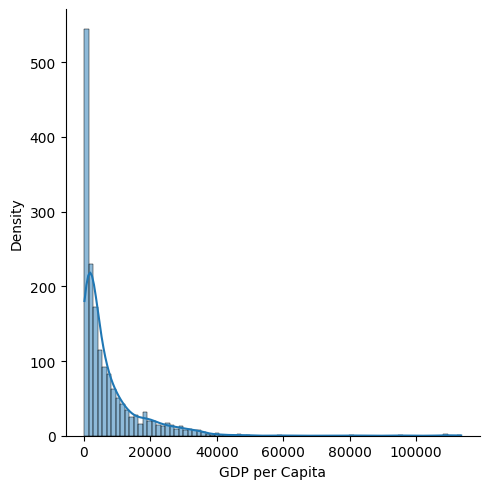

In [ ]:
sns.displot(df['gdpPercap'], kde=True)
plt.xlabel('GDP per Capita')
plt.ylabel('Density')
plt.show()

The plot of the 'gdpPercap' column shows an L-shaped distribution, indicating a significant disparity in GDP per capita values. It suggests a concentration of countries or regions with lower GDP per capita at the beginning of the plot, followed by a smaller number of countries or regions with higher GDP per capita.

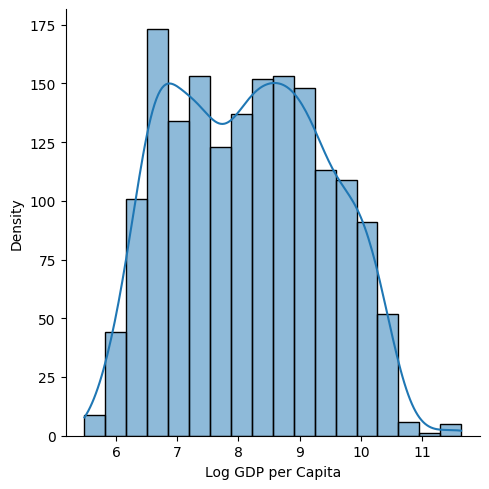

In [ ]:
df['log_gdp'] = np.log(df['gdpPercap'])
sns.displot(df['log_gdp'], kde=True)
plt.xlabel('Log GDP per Capita')
plt.ylabel('Density')
plt.show()

The logarithmic transformation of the 'gdpPercap' column helps approximate a normal distribution. The resulting plot shows the density of the transformed variable 'log_gdp'. Visualizing the density plot provides insights into the distribution and shape of the logarithmically transformed GDP per capita values.

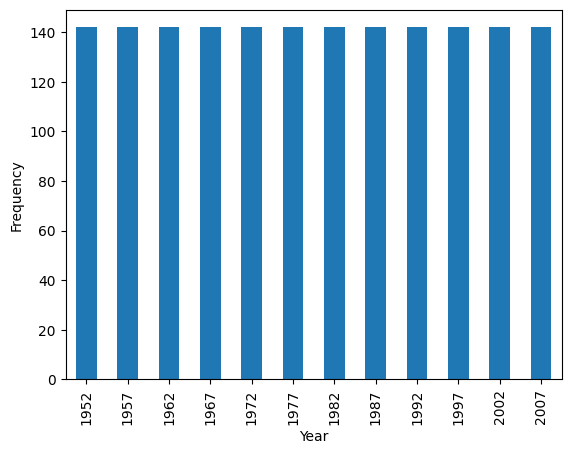

In [ ]:
frequency = df['year'].value_counts()
frequency.sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

This plot provides a visual representation of the distribution of the 'year' variable, allowing for easy comparison and identification of any patterns or disparities in the frequency of each year.

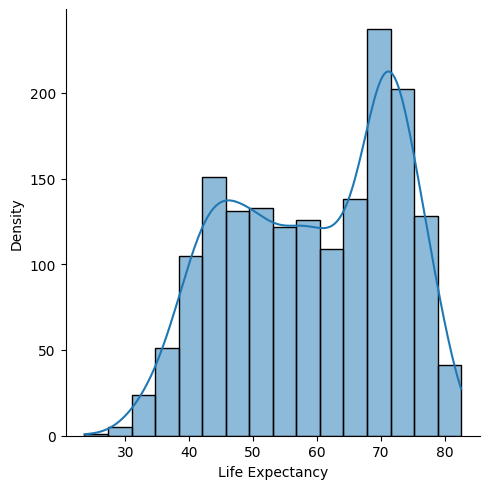

In [ ]:
sns.displot(df['lifeExp'], kde=True)
plt.xlabel('Life Expectancy')
plt.ylabel('Density')
plt.show()

The observed pattern of increasing life expectancy values, followed by a decrease, a period of constancy, and then another increase, suggests fluctuations and changes in life expectancy over time. It indicates potential shifts or influences affecting life expectancy trends.